In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import colors

Loading dataset

In [637]:
data=pd.read_csv('/Users/deepyuan/Desktop/data_kaggle/creditcard.csv')

In [638]:
data.shape

(284807, 31)

In [451]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


'V1~V28' are PCA transformed variables.
'Time' is the seconds elapsed between each transaction and the first transaction in the dataset. 
'Amount' is the transaction Amount. 
'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Let's describe and visualize the variables in the dataset.

In [664]:
print('Value 1: fraud')
data.groupby('Class').Class.count()
#we can see this is an unbalanced dataset

Value 1: fraud


Class
0    284315
1       492
Name: Class, dtype: int64

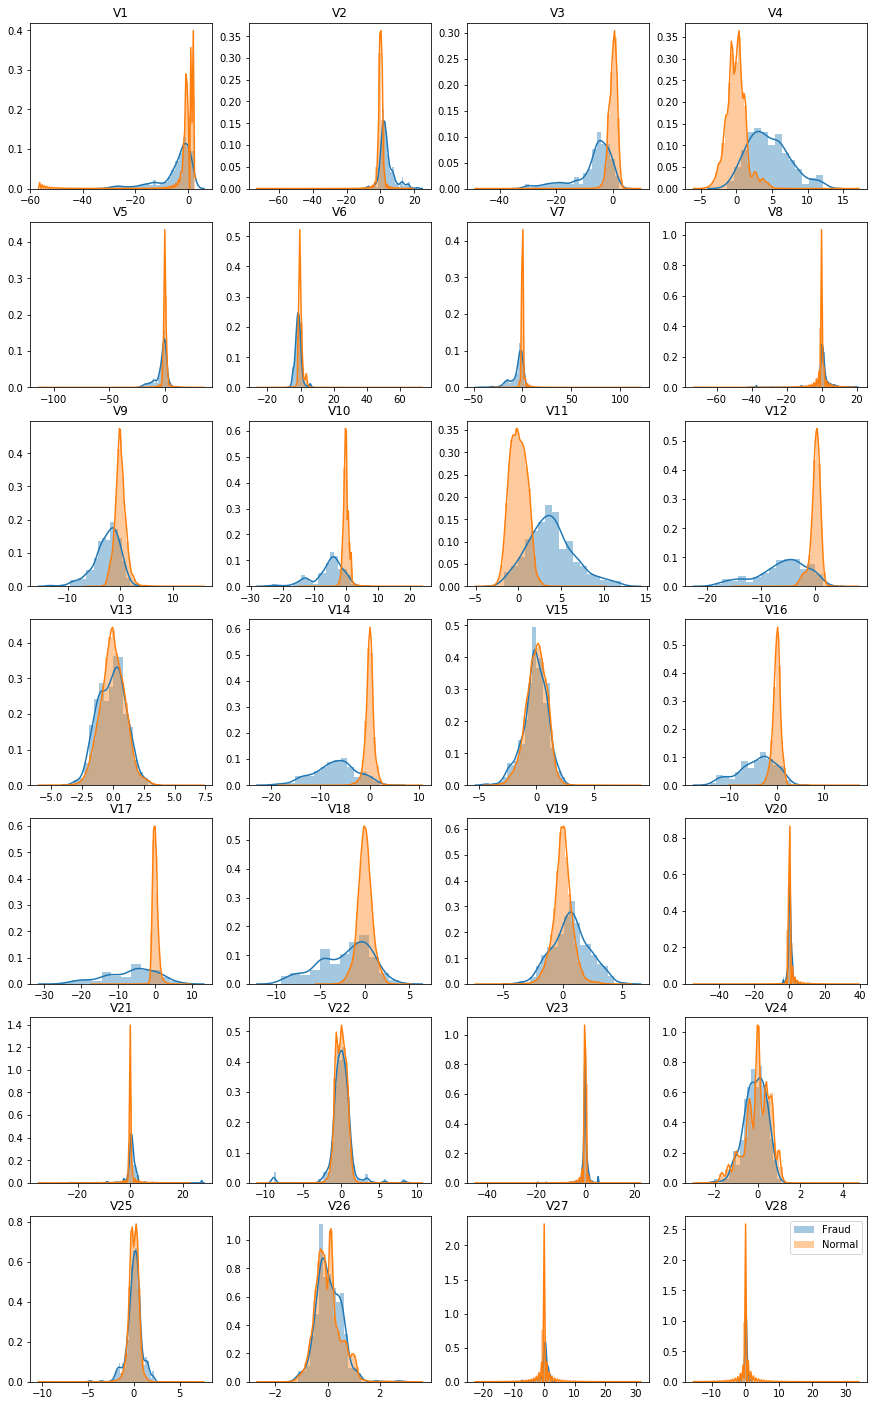

In [647]:
#'V1~V28 distributions Fraud VS. Normal'

import matplotlib.gridspec as gridspec
V_num = data.iloc[:,1:29].columns   

G = gridspec.GridSpec(7, 4)

def make_features_visiable(f):
 for i, v in enumerate(data[V_num]):
    ax = plt.subplot(G[i])
    sns.distplot(data[v][data.Class == 1], label='Fraud')
    sns.distplot(data[v][data.Class == 0], label='Normal')
    ax.set_xlabel('')
    ax.set_title( str(v))

f=plt.figure()

plt.figure(figsize=(15,25))
make_features_visiable(f)
plt.legend()
plt.show()

#V4,10,11,12,14,16,17,18 show a big difference between fraud and normal transaction

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


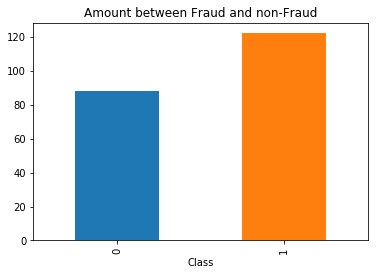

In [654]:
data.groupby('Class').Amount.mean().plot(kind='bar',title='Amount between Fraud and non-Fraud')
data.groupby('Class').Amount.describe()

Text(0.5,1,'Scatter plot of Transaction Time and Amount')

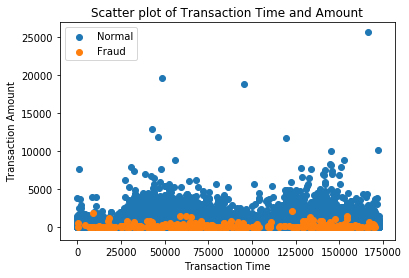

In [658]:
plt.scatter(data[data.Class==0].Time, data[data.Class ==0].Amount, label='Normal')
plt.scatter(data[data.Class==1].Time,data[data.Class ==1].Amount, label='Fraud')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.title('Scatter plot of Transaction Time and Amount')

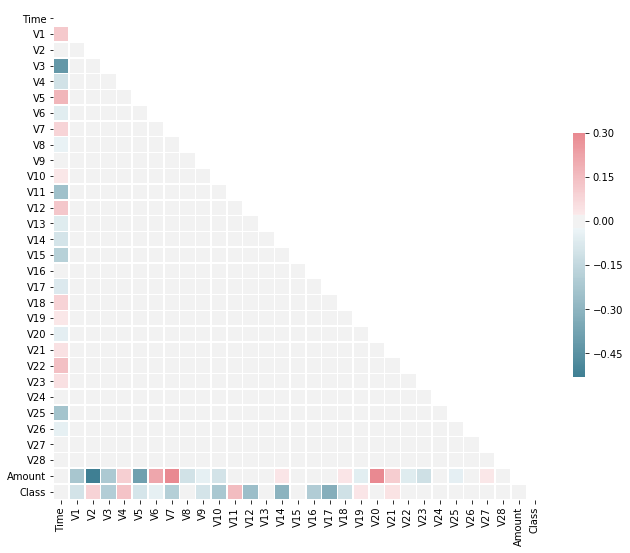

In [661]:
from matplotlib import cm as cm
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

standardized the 'Amount' variable and update a new dataset.

In [639]:
from sklearn.preprocessing import StandardScaler

In [662]:
data['stand_Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data_1=data.drop(['Time','Amount'], axis=1)
data['Class_cp']=data['Class']
data_1=data.drop(['Class'], axis=1)
data_1['Class']=data_1['Class_cp']
data_1=data_1.drop(['Time','Class_cp','Amount'], axis=1)

In [663]:
data_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,stand_Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [665]:
#split dataset
x=data_1.iloc[: , 0:29]
y=data_1.iloc[:,-1]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=100)

Average Precision-Recall Score  : 0.91 with C=0.01
Recall score : 0.60
Average Precision-Recall Score  : 0.91 with C=0.1
Recall score : 0.62
Average Precision-Recall Score  : 0.91 with C=1
Recall score : 0.65
Average Precision-Recall Score  : 0.91 with C=10
Recall score : 0.65


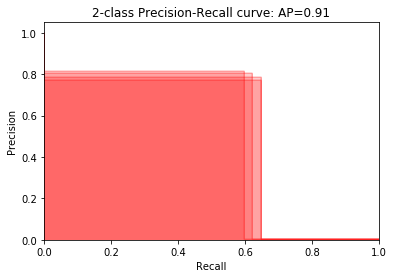

In [733]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve


C_param=[0.01, 0.1, 1, 10]  #choose different panalty parameter 'C'
for i in C_param:
 LogR=LogisticRegression(penalty='l2', C=i, random_state=0)
 log_model_1=LogR.fit(x_train, y_train)
 y_pred_1=log_model_1.predict(x_test)



 average_precision_1=average_precision_score(y_test, y_pred_1)
 print('Average Precision-Recall Score  : {0:0.2f}'.format(average_precision),'with C=%s'%i)


 recall_score_1=recall_score(y_test, y_pred_1)
 print('Recall score : {0:0.2f}'.format(recall_score_1))


 precision, recall, _ = precision_recall_curve(y_test, y_pred_1)

 plt.step(recall, precision, color='r', alpha=0.2, where='post')
 plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.ylim([0.0, 1.05])
 plt.xlim([0.0, 1.0])
 plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Use 'sm' Statistic models : logit model

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                         Results: Logit
Model:               Logit             No. Iterations:    9.0000 
Dependent Variable:  Class             Pseudo R-squared:  -inf   
Date:                2018-09-17 23:14  AIC:               inf    
No. Observations:    199364            BIC:               inf    
Df Model:            28                Log-Likelihood:    -inf   
Df Residuals:        199335            LL-Null:           -2570.4
Converged:           1.0000            Scale:             1.0000 
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
V1            -4.2215   0.0157 -269.2382 0.0000  -4.2522  -4.1908
V2             4.2705   0.0175  244.7227 0.0000   4.2363   4.3047
V3            -9.4144   0.0341 -276.1928 0.0000  -9.4812  -9.3476
V4   

Text(0.5,1,'2-class Precision-Recall curve: AP=0.58')

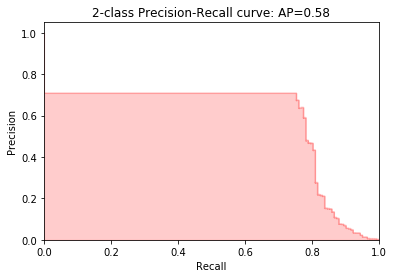

In [707]:
import statsmodels.api as sm
log_model_2=sm.Logit(y_train, x_train)
result_2=log_model_2.fit()
y_pred_2=result.predict(x_test)
print(result_2.summary2())

average_precision_2=average_precision_score(y_test, y_pred_2)
print('Average Precision-Recall Score : {0:0.2f}'.format(average_precision_2))

precision, recall, _ = precision_recall_curve(y_test, y_pred_2)
plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_2))

Now, we try to resample the dataset and get a balanced dataset to do the prediction

In [686]:
fraud_num=len(data_1[data_1.Class==1])
fraud_ind=np.array(data_1[data_1.Class==1].index)
nonfraud_ind=np.array(data_1[data_1.Class==0].index)
random_nonfraud_ind=np.random.choice(nonfraud_ind, fraud_num, replace=False)
resample_ind=np.concatenate([fraud_ind, random_nonfraud_ind])
resample_dataset=data_1.iloc[resample_ind, :]
resample_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,stand_Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [691]:
resample_x=resample_dataset.iloc[:, 0:29]
resample_y=resample_dataset.iloc[:, -1]
resample_x_train, resample_x_test, resample_y_train, resample_y_test=train_test_split(resample_x, 
                                                                     resample_y, test_size=0.3, random_state=100)

Average Precision-Recall Score : 0.89 with C=0.01
Average Precision-Recall Score : 0.91 with C=0.1
Average Precision-Recall Score : 0.90 with C=1
Average Precision-Recall Score : 0.92 with C=10


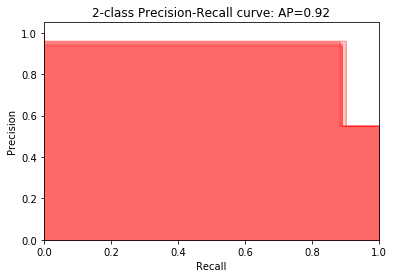

In [734]:
for i in C_param:
 LogR=LogisticRegression(penalty='l2', C=i, random_state=0)
 log_model_3=LogR.fit(resample_x_train, resample_y_train)
 y_pred_3=log_model_3.predict(resample_x_test)



 average_precision_3=average_precision_score(resample_y_test, y_pred_3)
 print('Average Precision-Recall Score : {0:0.2f}'.format(average_precision_3),'with C=%s'%i)


 precision, recall, _ = precision_recall_curve(resample_y_test, y_pred_3)
 plt.step(recall, precision, color='r', alpha=0.2, where='post')
 plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.ylim([0.0, 1.05])
 plt.xlim([0.0, 1.0])
 plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_3))

Optimization terminated successfully.
         Current function value: 0.088244
         Iterations 24
                         Results: Logit
Model:                Logit            No. Iterations:   24.0000 
Dependent Variable:   Class            Pseudo R-squared: 0.873   
Date:                 2018-09-17 23:13 AIC:              179.4243
No. Observations:     688              BIC:              310.9042
Df Model:             28               Log-Likelihood:   -60.712 
Df Residuals:         659              LL-Null:          -476.23 
Converged:            1.0000           Scale:            1.0000  
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
V1            -11.0037   2.4598 -4.4734 0.0000  -15.8248  -6.1826
V2             46.9186  35.6839  1.3148 0.1886  -23.0206 116.8579
V3            -48.0433  24.7575 -1.9406 0.0523  -96.5670   0.4804

Text(0.5,1,'2-class Precision-Recall curve: AP=0.99')

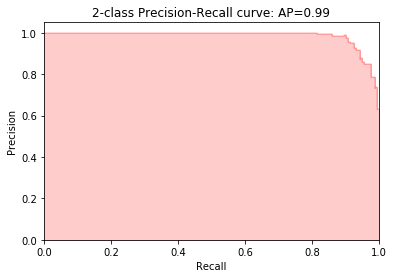

In [706]:
logit_model_4=sm.Logit(resample_y_train,resample_x_train)
result_4=logit_model.fit()
y_pred_4=result_4.predict(resample_x_test)
print(result_4.summary2())

average_precision_4=average_precision_score(resample_y_test, y_pred_4)
print('Average precision-Recall score : {0:0.2f}'.format(average_precision_4))

precision, recall, _=precision_recall_curve(resample_y_test, y_pred_4)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_4))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#for i  in range(1, 29):
#    for j in range(1,29):
#       clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=j)
#       clf_entropy.fit(resample_x_train,resample_y_train)
#       y_pred_5=clf_entropy.predict(resample_x_test)

#       average_precision_5 = average_precision_score(resample_y_test, y_pred_5)
#       print('Average precision-recall score- sklearn: {0:0.2f}'.format(average_precision_5), 
#       'with max_depth=%s'%i, 'and min_samples_leaf = %s'%j)

#Using above for loops we can see when 'max_depth=4' and 'min_samples_leaf=13' will give the best AP

Average precision-recall score- sklearn: 0.94


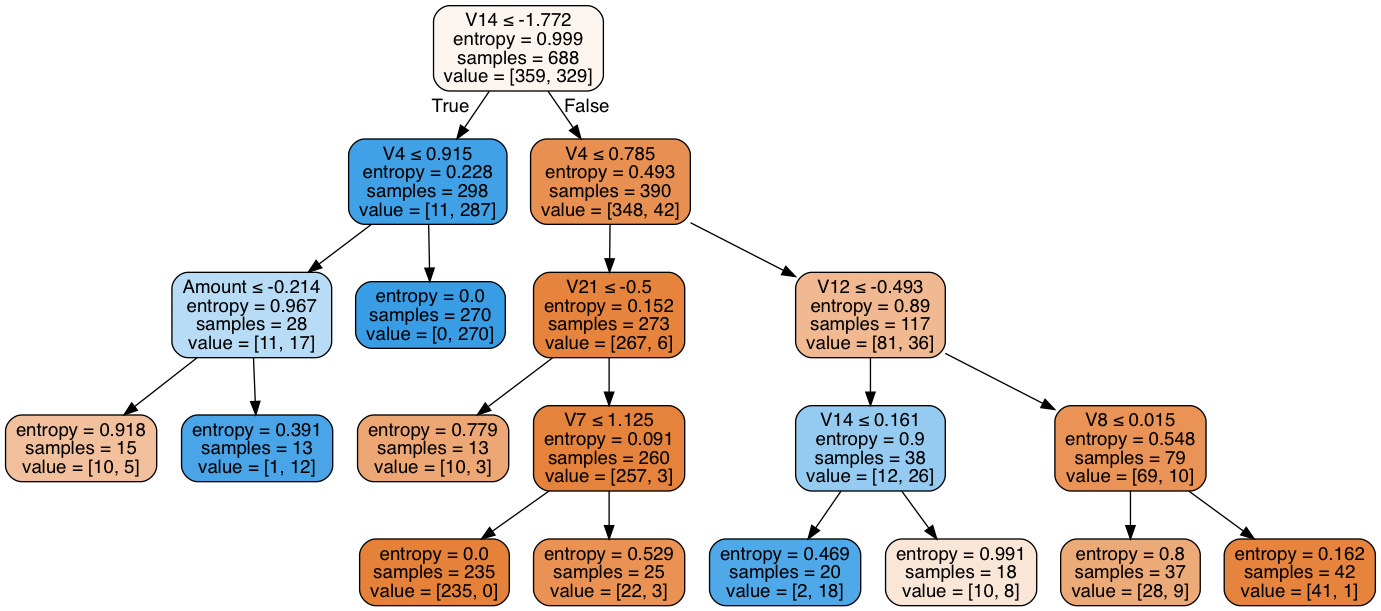

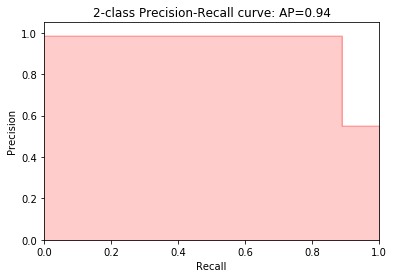

In [740]:
clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=13)
clf_entropy.fit(resample_x_train,resample_y_train)
y_pred_5=clf_entropy.predict(resample_x_test)

average_precision_5 = average_precision_score(resample_y_test, y_pred_5)
print('Average precision-recall score- sklearn: {0:0.2f}'.format(average_precision_5))



precision, recall, _=precision_recall_curve(resample_y_test, y_pred_5)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_5))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
data_feature_names=data.iloc[:,1:30].columns 
export_graphviz(clf_entropy, out_file=dot_data,  feature_names=data_feature_names, 
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Do the feature selection first:
    1) applying the previous distribution plots
    2) using feature selection previous the model building

Optimization terminated successfully.
         Current function value: 0.396180
         Iterations 11
                        Results: Logit
Model:              Logit            No. Iterations:   11.0000 
Dependent Variable: Class            Pseudo R-squared: 0.428   
Date:               2018-09-18 15:58 AIC:              563.1437
No. Observations:   688              BIC:              603.9478
Df Model:           8                Log-Likelihood:   -272.57 
Df Residuals:       679              LL-Null:          -476.23 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
V4       0.3371     0.0747    4.5106   0.0000    0.1906    0.4836
V9      -0.0087     0.0936   -0.0929   0.9260   -0.1922    0.1748
V10     -0.1017     0.0913   -1.1149   0.2649   -0.2806    0.0771
V11      0.012

Text(0.5,1,'2-class Precision-Recall curve: AP=0.98')

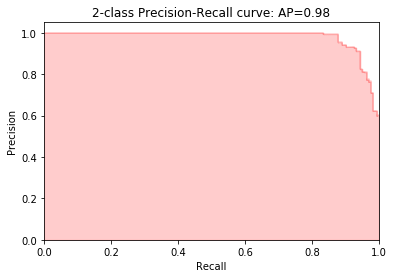

In [751]:
#V4,9,10,11,12,14,16,17,18,19 show a big difference between fraud and normal transaction

x_s=resample_dataset.iloc[:,[3,8,9,10,11,13,15,16,17]]
y_s=resample_dataset.iloc[:,-1]
x_s_train, x_s_test, y_s_train, y_s_test=train_test_split(x_s, y_s, test_size=0.3, random_state=100)

logit_model_6=sm.Logit(y_s_train, x_s_train)
result_6=logit_model_6.fit()
y_pred_6=result_6.predict(x_s_test)
print(result_6.summary2())

average_precision_6=average_precision_score(y_s_test, y_pred_6)
print('Average precision-Recall score : {0:0.2f}'.format(average_precision_6))

precision, recall, _=precision_recall_curve(y_s_test, y_pred_6)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_6))

Average Precision-Recall Score  : 0.90 with C=0.01
Average Precision-Recall Score  : 0.92 with C=0.1
Average Precision-Recall Score  : 0.92 with C=1
Average Precision-Recall Score  : 0.91 with C=10


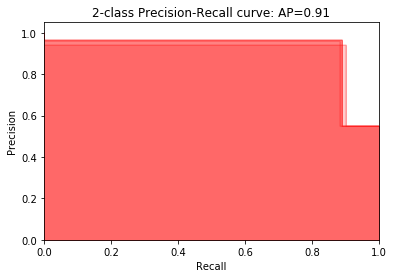

In [752]:
for i in C_param:
 LogR=LogisticRegression(penalty='l2', C=i, random_state=0)
 log_model_1=LogR.fit(x_s_train, y_s_train)
 y_pred_7=log_model_1.predict(x_s_test)

 average_precision_7=average_precision_score(y_s_test, y_pred_7)
 print('Average Precision-Recall Score  : {0:0.2f}'.format(average_precision_7),'with C=%s'%i)


 precision, recall, _ = precision_recall_curve(y_s_test, y_pred_7)

 plt.step(recall, precision, color='r', alpha=0.2, where='post')
 plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.ylim([0.0, 1.05])
 plt.xlim([0.0, 1.0])
 plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_7))

In [750]:
from sklearn.feature_selection import RFE

selector = RFE(LogR, 8, step=1)
selector = selector.fit(resample_x_train, resample_y_train)
selector.support_
selector.ranking_

#V4,6,8,12,13,23,24,26,27


array([13, 20, 15,  1, 14,  1,  6,  1,  7, 11,  9,  1, 17,  1, 12,  8, 10,
       19, 22,  4, 21,  2, 16,  1, 18,  1,  1,  5,  3])

Optimization terminated successfully.
         Current function value: 0.407071
         Iterations 9
                        Results: Logit
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: Class            Pseudo R-squared: 0.412   
Date:               2018-09-18 20:55 AIC:              578.1297
No. Observations:   688              BIC:              618.9338
Df Model:           8                Log-Likelihood:   -280.06 
Df Residuals:       679              LL-Null:          -476.23 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
V4       0.4002     0.0710    5.6361   0.0000    0.2610    0.5393
V6      -0.0712     0.0788   -0.9035   0.3663   -0.2257    0.0833
V8      -0.1732     0.0837   -2.0693   0.0385   -0.3372   -0.0092
V12     -0.5573

Text(0.5,1,'2-class Precision-Recall curve: AP=0.98')

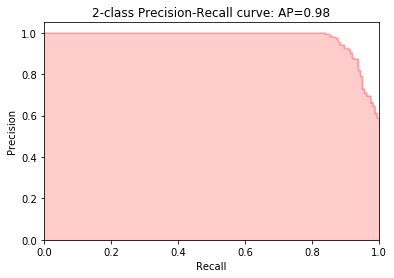

In [758]:
x_fs=resample_dataset.iloc[:,[3,5,7,11,12,22,23,25,26]]
y_fs=resample_dataset.iloc[:,-1]
x_fs_train, x_fs_test, y_fs_train, y_fs_test=train_test_split(x_fs, y_fs, test_size=0.3, random_state=100)

logit_model_8=sm.Logit(y_fs_train,x_fs_train)
result_8=logit_model_8.fit()
y_pred_8=result_8.predict(x_fs_test)
print(result_8.summary2())

average_precision_8=average_precision_score(y_fs_test, y_pred_8)
print('Average precision-Recall score : {0:0.2f}'.format(average_precision_8))

precision, recall, _=precision_recall_curve(y_fs_test, y_pred_8)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_8))

[[ 0.37738717 -0.10753915 -0.09548694 -0.44021866 -0.00730221 -0.03713174
  -0.07368792 -0.02190707  0.06075944]]
Average Precision-Recall Score  : 0.89 with C=0.01
[[ 0.71793652 -0.26072587 -0.2933405  -0.79589277 -0.10869854 -0.04844926
  -0.24077676 -0.1513158   0.19803594]]
Average Precision-Recall Score  : 0.91 with C=0.1
[[ 1.05132076 -0.53286085 -0.50224932 -1.04212099 -0.22558968  0.03673698
  -0.54662909 -0.31458301  0.4241652 ]]
Average Precision-Recall Score  : 0.90 with C=1
[[ 1.1635852  -0.64332284 -0.57463035 -1.11266143 -0.26244183  0.07694237
  -0.67712701 -0.36132379  0.52944706]]
Average Precision-Recall Score  : 0.90 with C=10


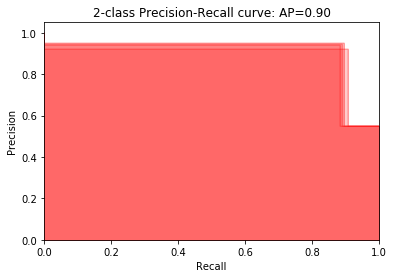

In [757]:
for i in C_param:
 LogR=LogisticRegression(penalty='l2', C=i, random_state=0)
 log_model_9=LogR.fit(x_fs_train, y_fs_train)
 y_pred_9=log_model_9.predict(x_fs_test)
 print(log_model_9.coef_)
    
 average_precision_9=average_precision_score(y_fs_test, y_pred_9)
 print('Average Precision-Recall Score  : {0:0.2f}'.format(average_precision_9),'with C=%s'%i)


 precision, recall, _ = precision_recall_curve(y_fs_test, y_pred_9)

 plt.step(recall, precision, color='r', alpha=0.2, where='post')
 plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

 plt.xlabel('Recall')
 plt.ylabel('Precision')
 plt.ylim([0.0, 1.05])
 plt.xlim([0.0, 1.0])
 plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_9))
